# Proyek Analisis Data: Peminjaman Sepeda
- **Nama:** Kodrat Nusantara
- **Email:** kodratnusantara@gmail.com
- **ID Dicoding:** nussaa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda harian pada musim semi selama 2011?
- Bagaimana pertumbuhan bulanan peminjam sepeda terdaftar selama musim panas 2011-2012?
- Bagaimana perbedaan jumlah peminjam sepeda biasa dan terdaftar tahun 2011?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Mencari informasi data, seperti nilai kosong, tipe data dan jumlah kolom.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Menampilkan informasi statistik, seperti nilai rata-rata, maksimum, minimum, standar deviasi, dan nilai kuartal, dari tiap kolom

In [6]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menampilkan jumlah nilai null dari tiap kolom

In [7]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Menampilkan jumlah data duplikat

In [8]:
df.duplicated().sum()

0

**Insight:**
- Tidak terdapat masalah dengan data, baik itu data duplikasi atau hilang
- Jumlah rata-rata peminjam sepeda selama tahun 2011-2012 adalah 4504
- Sedangkan jumlah paling sedikit yaitu 22 peminjam dan jumlah terbanyak adalah 8714 peminjam sepeda

### Cleaning Data

#### Menghapus data duplikat

In [9]:
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Menampilkan visualisasi terkait persebaran data

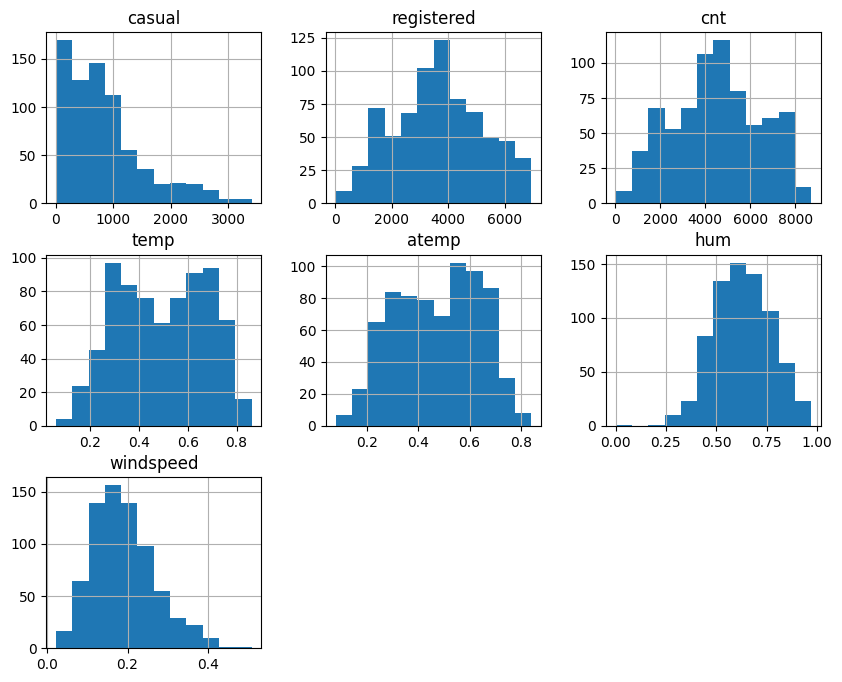

In [10]:
df[['casual', 'registered','cnt', 'temp', 'atemp', 'hum', 'windspeed']].hist(figsize=(10, 8), bins=12)
plt.title("Distribusi data", fontsize=16)
plt.show()

**Insight:**
- Persebaran data pada kolom registered, cnt, dan atemp cukup baik.
- Sedangkan persebaran data pada kolom lainnya tidak terlalu seimbang, misalnya pada kolom casual yang terlalu lebih condong ke arah kiri

## Visualization & Explanatory Analysis

### Pertanyaan 1:

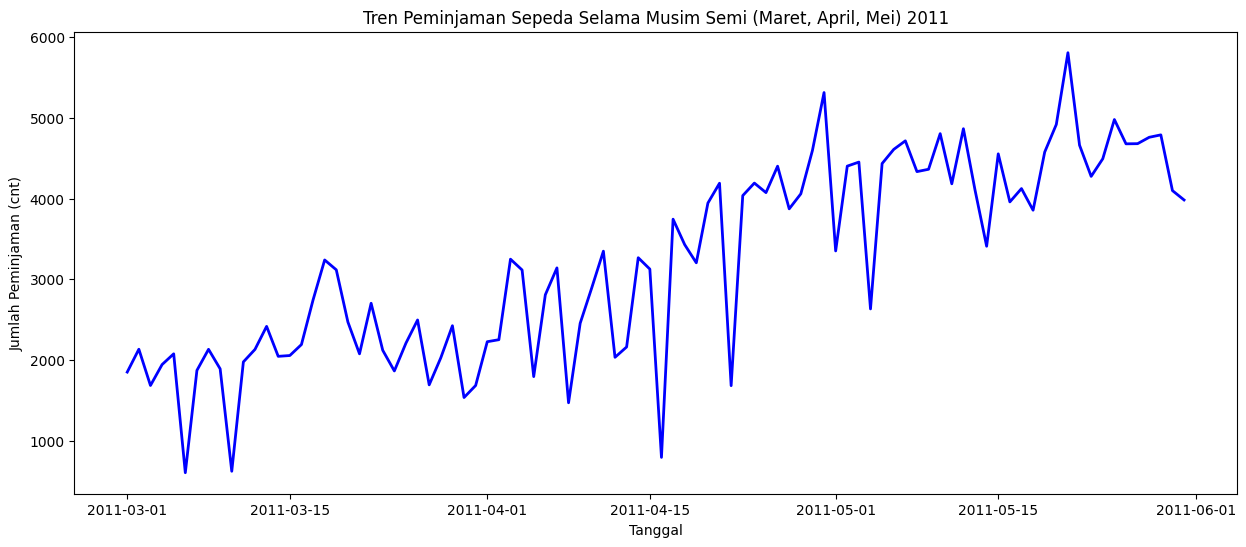

In [48]:
df['dteday'] = pd.to_datetime(df['dteday'])
df_spring_2011 = df[(df['yr'] == 0) & (df['mnth'].isin([3, 4, 5]))]

plt.figure(figsize=(15, 6))
plt.plot(df_spring_2011['dteday'], df_spring_2011['cnt'], linestyle='-', color='b', linewidth=2, markersize=12)
plt.title('Tren Peminjaman Sepeda Selama Musim Semi (Maret, April, Mei) 2011')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.show()

### Pertanyaan 2:

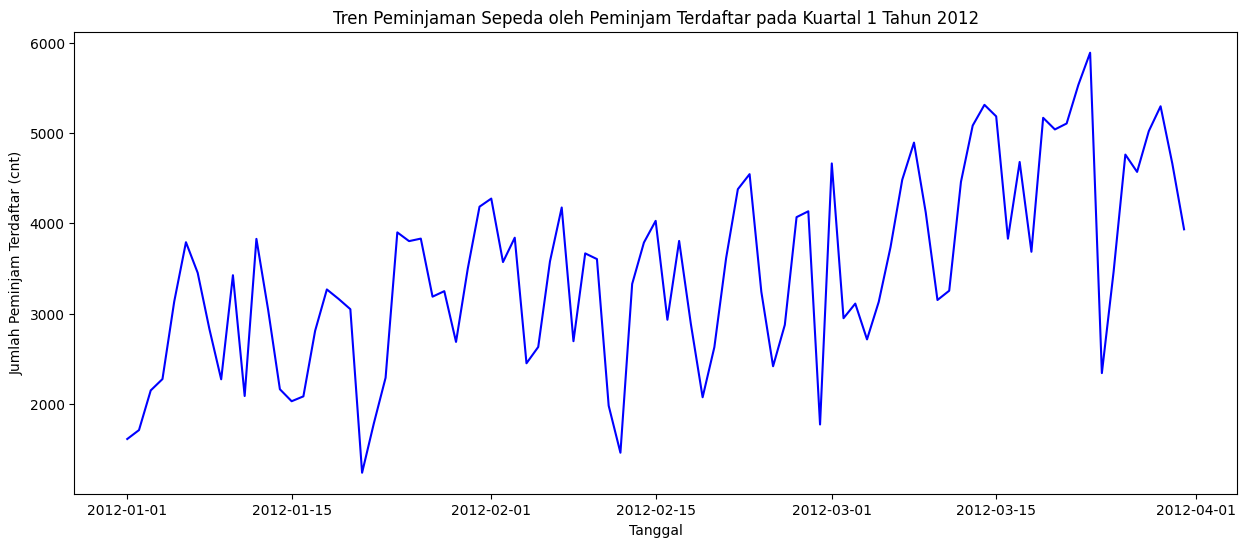

In [52]:
q1_2012 = df[(df['yr'] == 1) & (df['mnth'].isin([1, 2, 3]))]

# Plot the trend of registered users during Q1 2012
plt.figure(figsize=(15, 6))
plt.plot(q1_2012['dteday'], q1_2012['registered'],  linestyle='-', color='b')
plt.title('Tren Peminjaman Sepeda oleh Peminjam Terdaftar pada Kuartal 1 Tahun 2012')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjam Terdaftar (cnt)')
plt.show()

### Pertanyaan 3

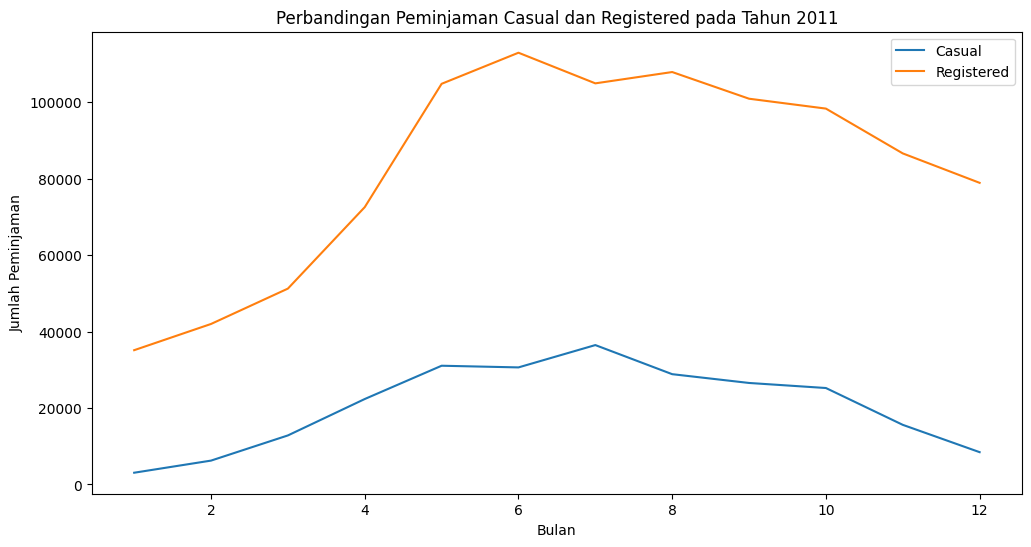

In [56]:
df_2011 = df[df['yr'] == 0]

rentals_2011 = df_2011.groupby('mnth')[['casual', 'registered']].sum()

plt.figure(figsize=(12, 6))
plt.plot(rentals_2011.index, rentals_2011['casual'], label='Casual')
plt.plot(rentals_2011.index, rentals_2011['registered'], label='Registered')
plt.title('Perbandingan Peminjaman Casual dan Registered pada Tahun 2011')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()


**Insight:**
- Peminjaman sepeda pada musim semi 2011 tetap meningkat sampai akhir musim. Meskipun terdapat penurunan di beberapa titik.
- Untuk peminjaman sepeda oleh peminjam yang terdaftar pada kuartal 1, hasil yang didapatkan kurang stabil, banyak titik yang fluktuatif. Penurunan ini mungkin disebabkan oleh musim yang kurang bersahabat.
- Sepanjang tahun 2011 peminjam yang terdaftar meningkat, pada puncaknya yaitu pertengahan tahun.
- Sedangkan untuk peminjam casual hampir memiliki pola yang sama dengan terdaftar, tapi tidak memiliki peningkatan yang signifikan

## Conclusion

- Musim semi 2011 terjadi peningkatan jumlah peminjaman sepeda yang signifikan, terutama seiring dengan berakhirnya musim. Tren peningkatan bisa jadi disebabkan oleh cuaca yang lebih hangat dan stabil. Selain itu, mungkin karena biasanya pada musim semi terdapat berbagai festival daerah dan libur panjang.
- Kuartal 1 2012 ini memperlihatkan hasil yang fluktuatif.Hal ini kemunkinan disebabkan oleh cuaca buruk dan perpindahan musim dari musim dingin ke musim semi.
- Terdapat Perbedaan yang signifikan antara peminjam casual dan terdaftar. Dimana peminjam terdaftar memiliki jumlah hampir 5 kali lipat dari peminjam casual